# Unit 5 - Financial Planning


In [222]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [223]:
# Load .env enviroment variables
load_dotenv('keys.env')
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [224]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [225]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [226]:
# Fetch current BTC price
btc_json = requests.get(btc_url).json()

# Fetch current ETH price
eth_json = requests.get(eth_url).json()

In [227]:
btc_val = btc_json['data']['1']['quotes']['USD']['price']
eth_val = eth_json['data']['1027']['quotes']['USD']['price']
print(eth_val, btc_val)


1755.87 46442.0


In [228]:
# Compute current value of my crpto
my_btc_value = btc_val * my_btc
my_eth_value = eth_val * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $55730.40
The current value of your 5.3 ETH is $9306.11


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [229]:
# Current amount of shares
agg = 50
spy = 200
shares_data = {
    "shares": [50, 200]
}

In [230]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [231]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [232]:
# Format current date as ISO format
today = pd.Timestamp("2021-01-04", tz="America/New_York").isoformat()

In [233]:
# Set the tickers
tickers = ["AGG", "SPY"]

In [234]:
df_shares = pd.DataFrame(shares_data, index=tickers)
df_shares

,shares
AGG,50
SPY,200


In [235]:
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [236]:
# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
df_portfolio

AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2021-01-04 00:00:00-05:00  118.08  118.14  117.985  118.04  6211938  375.31   

                                                             
                             high     low   close    volume  
time                                                         
2021-01-04 00:00:00-05:00  375.45  364.82  368.85  92938087

In [237]:
# Preview DataFrame
df_shares


,shares
AGG,50
SPY,200


In [238]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.04
Current SPY closing price: $368.85


In [239]:
# Compute the current value of shares
my_spy_value = spy_close_price * spy
my_agg_value = agg_close_price * agg
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $73770.00
The current value of your 200 AGG shares is $5902.00


### Savings Health Analysis

In [240]:
# Set monthly household income
monthly_income = 12000
# Create savings DataFrame


# Set the tickers
tickers = ["Bitcoin", "Stocks"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)
shares_data = {
    'Bitcoin': [my_btc_value, my_eth_value],  
    'Stocks': [my_spy_value, my_agg_value]
}
# Display savings DataFrame
display(df_savings)

{'Bitcoin': [56108.4, 9343.37], 'Shares': [73770.0, 5902.0]}

In [245]:
total_savings = my_btc_value + my_eth_value + my_spy_value + my_agg_value
total_savings

144708.511

In [248]:
# Plot savings pie chart
df_shares.plot.pie(y='Bitcoin', title="Stocks Portfolio Composition")

KeyError: 'Bitcoin'

In [249]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_btc_value + my_eth_value + my_spy_value + my_agg_value
total_savings
# Validate saving health
if emergency_fund > total_savings:
    print('Congratulations! You have enough money in your emergency fund.')

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [253]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [254]:
timeframe_2 = "1D"

tickers_2 = ["AGG","SPY"]

df_stock_data = alpaca.get_barset(
    tickers_2,
    timeframe_2,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30173684   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-03-18 00:00:00-04:00  236.25  248.3700  228.02  241.01  256921808  
2020-03-19 00:00:00-04:00  239.25  247.3800  232.22  241.18  248430643  
2020-03-20 00:00:00-04:00  242.53  244.4700  228.50  228.94  286308782  
2020-03-23 00:00:00-04:00  228.19  229.6833  218.26  222.51  268298876  
2020-03-24 00:00:00-04:00  234.42  244.1000  233.80  243.59  203576470

In [255]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [256]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30173684   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-03-18 00:00:00-04:00          NaN  236.25  248.3700  228.02  241.01   
2020-03-19 00:00:00-04:00     0.024828  239.25  247.3800  232.22  241.18   
2020-03-20 00:00:00-04:00     0.004772  242.53  244.4700  228.50  228.94   
2020-03-23 00:00:00-04:00     0.027948  228.19  229.6833  218.26  222.51   
2020-03-24 00:00:00-04:00     0.006575  234.42  244.1000  233.80  243.59   

                                                   
                              volume daily_return  
time                                               
2020-03-18 00:00:00-04:00  256921808          NaN  
2020-03-19 00:00:00-04:00  248430643     0.000705  
2020-03-20 00:00:00-04:00  286308782    -0.050750  
2020-03-23 00:00:00-04:00  268298876    -0.028086  
2020-03-24 00:00:00-04:00  203576470     0.094737

In [257]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,1.002429e+00,1.000796e+00,9.835946e-01,1.005364e+00,1.007241e+00,9.870560e-01,9.996100e-01,1.000999e+00,1.008971e+00,1.006706e+00,...,1.016087e+00,9.928549e-01,1.000906e+00,1.018034e+00,1.015724e+00,1.011799e+00,9.860409e-01,9.818442e-01,1.003145e+00,9.939073e-01
2,1.001497e+00,1.022792e+00,9.805584e-01,1.024335e+00,9.979684e-01,9.938504e-01,9.876293e-01,1.005545e+00,1.016756e+00,9.942198e-01,...,1.014485e+00,9.849490e-01,9.948044e-01,1.013422e+00,1.039874e+00,1.012161e+00,9.852472e-01,9.853476e-01,9.992120e-01,1.004170e+00
3,1.002415e+00,1.022166e+00,9.758487e-01,1.028430e+00,9.978960e-01,9.967897e-01,9.905451e-01,1.022907e+00,1.027623e+00,1.007917e+00,...,1.009260e+00,9.873316e-01,9.898043e-01,1.006345e+00,1.027364e+00,1.025933e+00,9.802315e-01,9.899423e-01,1.000801e+00,1.014241e+00
4,1.001550e+00,1.042381e+00,9.981695e-01,1.031974e+00,1.010676e+00,1.003954e+00,1.002416e+00,1.020475e+00,1.013699e+00,1.000318e+00,...,1.007828e+00,9.934311e-01,9.830436e-01,1.010534e+00,1.039069e+00,1.030164e+00,9.862018e-01,9.965817e-01,9.973298e-01,1.013003e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.261207e+06,4.351938e+06,3.243432e+06,1.231049e+07,1.061445e+07,4.344422e+06,3.266453e+06,7.237079e+06,1.741689e+07,3.601526e+06,...,6.938142e+06,1.029594e+07,1.517905e+07,3.251364e+06,9.051265e+06,4.990908e+06,1.083791e+07,1.355038e+07,1.157925e+07,8.325057e+06
7557,6.165753e+06,4.367764e+06,3.191317e+06,1.246070e+07,1.065399e+07,4.402771e+06,3.337979e+06,7.326876e+06,1.736573e+07,3.618767e+06,...,6.927347e+06,1.049217e+07,1.513466e+07,3.282093e+06,9.001272e+06,5.010438e+06,1.067125e+07,1.362739e+07,1.159921e+07,8.322188e+06
7558,6.268861e+06,4.422583e+06,3.204731e+06,1.252028e+07,1.044113e+07,4.457221e+06,3.289232e+06,7.351223e+06,1.757080e+07,3.604687e+06,...,6.938190e+06,1.052897e+07,1.507231e+07,3.252678e+06,8.981920e+06,5.028825e+06,1.059016e+07,1.365538e+07,1.164410e+07,8.318963e+06
7559,6.285898e+06,4.378407e+06,3.190900e+06,1.250355e+07,1.054138e+07,4.413816e+06,3.290493e+06,7.313411e+06,1.747664e+07,3.599382e+06,...,7.025810e+06,1.070326e+07,1.501006e+07,3.274543e+06,9.080332e+06,5.063581e+06,1.051223e+07,1.366736e+07,1.155329e+07,8.426359e+06


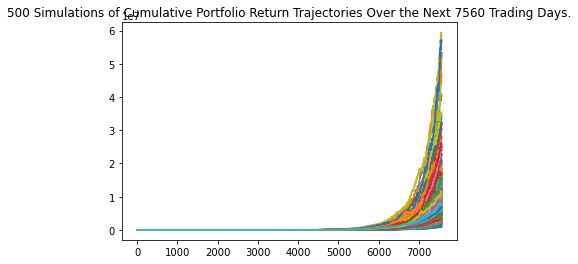

In [258]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

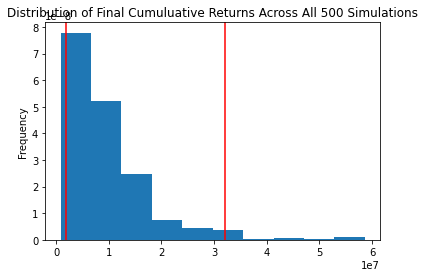

In [259]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

dist_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [260]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           5.000000e+02
mean            9.635424e+06
std             8.256124e+06
min             8.263706e+05
25%             4.218896e+06
50%             7.328533e+06
75%             1.231542e+07
max             5.863433e+07
95% CI Lower    1.774408e+06
95% CI Upper    3.203461e+07
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [262]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $35488157306.2 and $640692235754.71


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [263]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $53232235959.3 and $961038353632.07


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [265]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [266]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.018790,1.010266,0.988492,1.011246,1.003908,0.984878,0.996638,1.000614,0.999807,0.992559,...,1.006832,0.995862,1.025211,1.008622,0.987537,0.992293,0.984752,1.005716,0.987659,1.009208
2,1.021877,1.007379,1.010092,1.003257,0.994048,0.990326,0.999671,0.989077,1.011332,0.997000,...,1.003612,1.002933,1.037427,0.998600,0.990220,0.987462,0.982351,1.009090,0.986690,1.013622
3,1.029528,1.019022,1.009445,1.017026,0.996963,0.987273,0.999000,0.992909,1.003597,1.015773,...,1.011970,0.998157,1.040856,0.999803,0.982984,0.996007,0.986216,0.999929,0.999053,1.013890
4,1.031121,1.032934,0.997023,1.027534,0.987238,0.982668,1.004750,0.987044,1.017483,1.014528,...,0.997085,0.996706,1.035844,1.012597,0.971691,0.995310,0.986160,1.010104,1.008981,1.024063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,13.976449,17.968667,10.425365,9.771015,6.982865,13.689706,10.876498,18.758663,19.276292,7.751744,...,15.297615,14.630605,19.658346,15.121670,7.013097,8.655965,11.646656,10.134115,18.758309,9.246530
1257,14.215648,17.779291,10.473863,9.818951,7.040561,13.653226,10.938067,18.783219,19.223118,7.744363,...,15.436886,14.591169,19.682735,15.103095,7.029952,8.837709,11.752245,10.124615,18.660518,9.187499
1258,14.208958,17.962898,10.596331,9.920178,7.007292,13.685367,10.984585,18.683986,18.992571,7.767499,...,15.434106,14.544066,19.569535,15.452884,7.010678,8.776368,11.736293,10.033287,18.642058,9.272878
1259,14.089049,18.143898,10.531583,9.909090,7.038798,13.828403,11.024416,18.465450,19.215958,7.929658,...,15.473493,14.653293,19.787322,15.534440,7.010940,8.983427,11.656437,10.092436,18.525470,9.427960


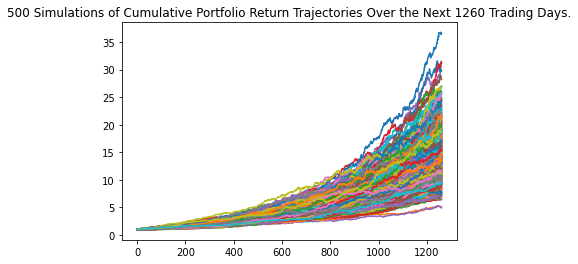

In [268]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()


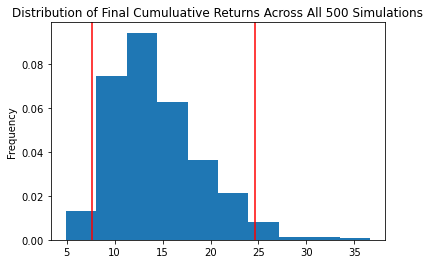

In [269]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()


In [270]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             14.473795
std               4.611521
min               4.899208
25%              10.940648
50%              13.731768
75%              17.091437
max              36.647192
95% CI Lower      7.621246
95% CI Upper     24.599550
Name: 1260, dtype: float64


In [271]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $152424.92 and $491990.99


### Ten Years Retirement Option

In [272]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [273]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002965,1.008927,0.990212,1.021930,0.992695,1.014337,1.003517,1.002276,1.008472,1.007147,...,1.017738,1.001126,0.989499,1.018087,1.013859,1.006724,0.993592,1.005103,0.997394,1.004804
2,1.004711,1.014335,0.996432,1.029708,1.003429,1.016828,1.003368,0.998213,1.007462,1.013754,...,1.015209,0.996347,0.986358,1.025918,1.012879,1.020219,0.988813,0.994798,0.994250,1.012769
3,0.994249,1.013685,0.987043,1.024754,1.005489,1.021043,0.998489,0.993562,0.997113,1.017190,...,1.020915,1.011432,0.976313,1.010731,1.003356,1.022391,0.994902,1.014321,0.996414,1.016389
4,0.977980,1.000459,1.010070,1.008118,0.999631,1.010717,1.003650,0.995115,1.011206,1.029845,...,1.023833,1.020450,0.971418,1.005599,1.004072,1.017050,0.994738,1.018841,0.992603,1.015961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,12.843062,11.353099,12.002021,11.674020,17.683147,13.321426,13.240526,9.342695,13.792671,14.109043,...,12.974398,14.721914,12.557189,11.623624,8.520181,11.355421,17.034324,9.750159,13.430741,17.988236
1257,12.709707,11.521703,11.900992,11.716611,17.570932,13.471155,13.342655,9.196004,14.041967,14.007672,...,12.850656,14.751325,12.680584,11.679888,8.556917,11.227407,16.766504,9.857621,13.623261,17.753868
1258,12.666174,11.617535,11.886979,11.765876,17.722721,13.310341,13.308388,9.189247,14.059905,14.268796,...,13.030797,14.781911,12.638689,11.680671,8.467398,11.332694,16.933380,10.117579,13.733761,17.913580
1259,12.728876,11.624724,11.978382,11.746888,17.770182,13.264623,13.271422,9.179978,13.948214,14.726273,...,12.808873,14.607231,12.809885,11.681926,8.457331,11.320404,17.048403,10.234770,13.584122,18.065909


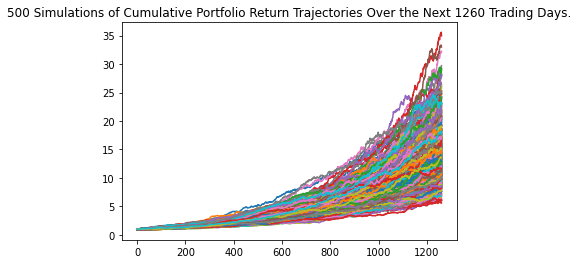

In [274]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()


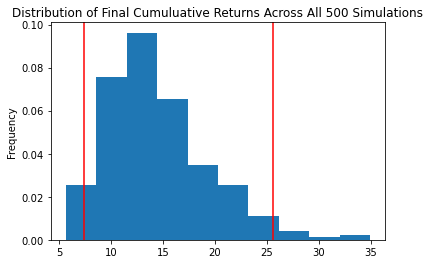

In [275]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()


In [276]:
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             14.473795
std               4.611521
min               4.899208
25%              10.940648
50%              13.731768
75%              17.091437
max              36.647192
95% CI Lower      7.621246
95% CI Upper     24.599550
Name: 1260, dtype: float64


In [277]:
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $152424.92 and $491990.99
